In [1]:
import sys
sys.path.insert(0,'../models/')

In [2]:
import pickle, pystan, ssl, sys, copy
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import wilson as w
import circuitnumeric as cc

In [3]:
%matplotlib inline

### Compile or load Stan model

In [4]:
model_path = "../models/"
model_name = "casel_forward"
compile_path = "../models/compiled/"

## model = pystan.StanModel(file = (model_path + model_name + ".stan"))
model = pystan.StanModel(file="../models/case1_forward.stan")
with open(compile_path + model_name + '.pkl', 'wb') as f:
   pickle.dump(model, f)

# model = pickle.load(open(compile_path + model_name + '.pkl', 'rb'))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9bf72804f738f2ca409e4b86f6447e2b NOW.


## Build Stan dictionary

### some attributes

In [5]:
#setup data dictionary for Stan
dat = {}
J = 1
beta = 1.5
dat['J'] = J
dat['beta'] = beta

c_ = [0.5]#np.linspace(0.1,1,10)

n = 1000 #n per c-pair
cc_ = np.zeros((n*len(c_),2))

k = -1 
for c in c_:
    for i in range(n):
        k += 1
        cc_[k,:] = [1,c]
        

dat['Ns'] = n*len(c_)
dat['c'] = cc_
dat['Nd'] = 100
dat['x_r'] = [0.0]
dat['x_i'] = [0]
dat['rel_tol'] = 1e-3
dat['function_tol'] = 1e-1
dat['max_steps'] = 1000


In [6]:
fit = model.sampling(data = dat, chains = 1, iter=1, algorithm = "Fixed_param")

In [7]:
print(fit.extract().keys())

odict_keys(['Ts_obs', 'uinf', 't12', 'lambda', 'Tdyn_obs', 'lp__'])


In [8]:
# print(fit)

In [9]:
print(fit.extract()['uinf'][0][0,:])

[0.4145672  0.39069463]


In [10]:
T1 = []
T2 = []
k = -1
# for i in range(1,10):
print(i)
t1 = []
t2 = []
for j in range(n):
    k += 1
    t1.append(fit.extract()['Ts_obs'][0][k,0])
    t2.append(fit.extract()['Ts_obs'][0][k,1])
T1.append(np.mean(t1))
T2.append(np.mean(t2))

print(np.mean(t1))
print(np.mean(t2))
print(np.std(t1))
print(np.std(t2))

print(np.std(t1)/np.mean(t1))
print(np.std(t2)/np.mean(t2))


999
0.896897694982343
0.6811533470148209
0.7124063271656862
0.5359300541648778
0.7943005441436787
0.786797945739547


In [11]:
DF={} #dataframe that is operated on
w.DF=DF


DF['alpha1']=0.
DF['alpha2']=0.
DF['beta1']=beta
DF['beta2']=beta
DF['gamma1']=2.0
DF['gamma2']=2.0
DF['etaS1']=0.1
DF['etaS2']=0.1

DF['J1']=J
DF['J2']=J
DF['S01']=0.0
DF['S02']=0.0
DF['taua1']=1
DF['taua2']=1

DF['etag1']=0.5
DF['etag2']=0.5

ci = 0
DF[ci]={}
DF[ci]['c1']=1.0
print(c_)
DF[ci]['c2']=c_[-1]
w.calcuinf_newton(ci)
print(DF[ci]['uinf1'])
print(DF[ci]['uinf2'])

w.calcdudtheta(ci)
w.calcT(ci)
print(DF[ci]['T1hat'])
print(DF[ci]['T2hat'])

[0.5]
0.4142060089717761
0.39032858396832304
0.9180179773556582
0.6924204753178218


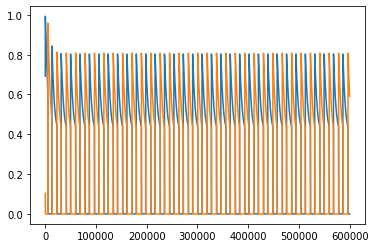

In [12]:
cc.P = w.DF.copy()
u,a = cc.ccc(ci)
plot(u.T)

In [13]:
cc.calcTNpool(u)

(1.0052838709677419, 0.8457966666666665)

In [14]:
# fit.extract()['Ts_obs'][0][0,1]

In [15]:
# print(T1)
# print(T2)